In [ ]:
# DSC 540
# Weeks 7 & 8
# Summer 2024
# Weeks 7 & 8 Exercises
# Created By Matthew Heinen
# 7/21/24

# 1) Activity 7.01

In [4]:
# 1) Import the necessary libraries. 

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

In [8]:
# 2 Read in the html from the URL 

# define the url store as url
url = 'https://www.gutenberg.org/browse/scores/top'

# use requests.get to call the url. 
#store in response. 
response = requests.get(url)

In [12]:
# 3) Write small function to check status of the web request. 

# Write function ststus_check 
# pass r (response) 

def status_check(r):
    # Check to see if statuse code is 200 if so print sucess. 
    if r.status_code==200:
        print("Success!")
        return 1
    # For all other ststus codes return failed. 
    else:
        print("Failed!")
        return -1

In [14]:
# Use status_check function to test response. 
status_check(response)

Success!


1

In [16]:
# 4) Decode the response and pass this on to beautiful soup for HTML parsing. 

# Use content. decode and response.encoding to decode the response
# store this response in a new variable decoded
decoded = response.content.decode(response.encoding)



In [28]:
# pass decoded into beautiful soup for parsing. 
# use HTML parser
soup = BeautifulSoup(decoded, 'html.parser')

In [30]:
# 5) find all href tags and store them in a list of links. Check what the list looks like - print the first 30 elements. 


# initialize links to hold list of url's 
links=[]


In [40]:

# loop through soup and find all href links
# Use find_all. 
for link in soup.find_all('a'):
    # Add href links to the list of links. 
    links.append(link.get('href'))

In [42]:
# Print the first 30 elements of the links list.
links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1']

In [54]:
# 6) find the numeric didgets in these links. These are the file numbers of the top 100 ebooks. 

# initialize book num as empty list. 
# here we will store the numbers. 
booknum=[]

#loop through every link in the list of links 
for i in range(19,119):
    link=links[i]
    # use strip to remove puncuation etc
    link=link.strip()
    # 7) use the findall from regrex method to find the numeric didgets in the string. 
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Add the file number to the list
        # store as an intiger
        booknum.append(int(n[0]))


In [56]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)



The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 1513, 2701, 2641, 145, 37106, 100, 1342, 16389, 67979, 6761, 394, 2160, 6593, 1259, 4085, 5197, 84, 33283, 11, 74181, 5200, 345, 2554, 28054, 74184, 49010, 2000, 174, 2600, 74183, 4300, 219, 98, 64317, 1661, 2542, 1998, 6130, 52200, 30254, 27827, 1232, 76, 16119, 45, 844, 74182, 514, 2591, 1184, 50150, 2650, 5740, 1952, 67098, 4363, 1400, 1727, 768, 42157, 43, 74188, 996, 135, 2680, 36034, 244, 120, 132, 8800, 1260, 8492, 74, 398, 31284, 74187, 23700, 1080, 74179, 10, 17489, 205, 31552, 600, 58585]


In [58]:
# 8) print the first 2000 characters of the soup text. 
# Use .text method
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Ways to donate







To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not considered.
Books made out o

In [74]:
# 9) Search the extracted text (using a regular expression) 
# from the soup object to find the names of the top 100 ebooks. 

# initialize empty list to store ebook names. 
# Temp empty list of Ebook names
lst_titles_temp=[]

In [76]:
# 11) run for loop to add strings to temp list. 

# Define a start index 
# Here this will allow to begin to collect title names after the Ebook title is displayed
# use tex and split lines to vreate split or start point. 

start_index=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [80]:
# 11) run for loop to add strings to temp list. 
# loop through the first 100 titles 
for i in range(100):
    # Add these titles to the temporary list after the start index. 
    # use text and split lines to itetrate through each line after the start. 
    lst_titles_temp.append(soup.text.splitlines()[start_index+2+i])

In [82]:
# Initialize list to perm store titles. 
lst_titles=[]
# 12) ues match and span to find indices and use them. 
#loop through first 100 titles 
for i in range(100):
    # Define ID and ID to and itterate through each item in temp list 
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    # Add titles id /id2 to the final list. 
    lst_titles.append(lst_titles_temp[i][id1:id2])


In [86]:
# 13) Print a list of titles. 

# Loop through and print every item in the top eBooks list. 
for l in lst_titles:
    print(l)

Romeo and Juliet by William Shakespeare 
Moby Dick
A Room with a View by E
Middlemarch by George Eliot 
Little Women
The Complete Works of William Shakespeare by William Shakespeare 
Pride and Prejudice by Jane Austen 
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T
History of Tom Jones
Twenty years after by Alexandre Dumas and Auguste Maquet 
The Adventures of Roderick Random by T
My Life 
Frankenstein
Calculus Made Easy by Silvanus P
Alice
Millions of cats by Wanda G
Metamorphosis by Franz Kafka 
Dracula by Bram Stoker 
Crime and Punishment by Fyodor Dostoyevsky 
The Brothers Karamazov by Fyodor Dostoyevsky 
The negro workers 

Don Quijote by Miguel de Cervantes Saavedra 
The Picture of Dorian Gray by Oscar Wilde 
War and Peace by graf Leo Tolstoy 
My heart and my flesh by Elizabeth Madox Roberts 
Ulysses by James Joyce 
Heart of Darkness by Joseph Conr

# 2) Activity 7.02

In [98]:
# 1) Import necessary packages. 
import urllib.request, urllib.parse, urllib.error
import json


In [100]:
# 3 store API Key
# Write API key into JSON file 
# API key
api_key = '304995df'

# Create a dictionary to store the API key
api_key_data = {
    'OMDBapi': api_key
}

# Write the API key data to a JSON file
with open('APIkeys.json', 'w') as file:
    json.dump(api_key_data, file)

In [102]:
# 4) open file. 
# Load the API key from file
# use json.loads()

with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [104]:
# 5) assign OMBd portal as string value to variable. 
serviceurl = 'http://www.omdbapi.com/?'

In [106]:
# 6) Create variable API key with the last portion of the URL 
apikey = '&apikey='+omdbapi

In [112]:
#7) write function print JSON to print movie data 
def print_json(json_data):
    # Define keys list. 
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        # Loop throug thr keys and print the JSON data. 
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)


In [114]:
# 8) Write utility function to download movie poster 

def save_poster(json_data):
    #Import packages
    import os
    # Define title 
    title = json_data['Title']
    # define the poster URL from the JSON data
    poster_url = json_data['Poster']
    # Use split to split the poster url at the period 
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # If dictionary does not exist create new path, otherwise use the same path. 
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    #open the file 
    f=open(filename,'wb')
    # Write poster data to file 
    f.write(poster_data)
    # close the file. 
    f.close()

In [116]:
# 9) Writ utility function to search a movie by its name. 

# Buils search function to find the movie information by searching a title 
# pass the title
def search_movie(title):
    # Try block to reach the API 
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        # Print header message
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        # use url open to open the request. 
        uh = urllib.request.urlopen(url)
        #read and store data in variable .
        data = uh.read()
        # store JSON form. 
        json_data=json.loads(data)

        # If we get a response
        if json_data['Response']=='True':
            # print the data to user. 
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
         
                save_poster(json_data)
        # Error hendeling id the json data has an error
        else:
            print("Error encountered: ",json_data['Error'])
    # Exception handle for URL error. 
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")


In [118]:
# 10) Test search movie function by entering titanic. 

# Call Search Movie.
# pass Titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=304995df
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,292,276
imdbID: tt0120338
--------------------------------------------------


In [120]:
# 11) pass random error into the search movie function. 
# the purpose here is to test error handeling. 
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=304995df
Error encountered:  Movie not found!


In [ ]:
# Check file directory for the movie poster from titanic. 

# Note: the jpeg is there. 

# 3) Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.

## Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API


In [159]:
# We Have chosen to use a stock API to display stock information. 

# API KEY: P4ZZBS5VD8WA2PAH

# Import packages
import requests

# define url 
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY'


# Define the parameters
# Edit params to find soock you wish 
params = {
    # Chose wells fargo to search
    'symbol': 'WFH',
    'interval': '5min',
    'apikey' : 'P4ZZBS5VD8WA2PAH'
}


# Define request use get to make call.
response = requests.get(url, params=params)

# Store Json data
data = response.json()
# print the result 
print(data)




{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'WFH', '3. Last Refreshed': '2024-08-06 20:00:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2024-08-06 20:00:00': {'1. open': '51.2980', '2. high': '51.2980', '3. low': '51.2980', '4. close': '51.2980', '5. volume': '100'}, '2024-08-06 18:30:00': {'1. open': '51.2980', '2. high': '51.2980', '3. low': '51.2980', '4. close': '51.2980', '5. volume': '100'}, '2024-08-06 16:10:00': {'1. open': '51.2980', '2. high': '51.2980', '3. low': '51.2980', '4. close': '51.2980', '5. volume': '100'}, '2024-08-06 16:00:00': {'1. open': '51.3500', '2. high': '51.3500', '3. low': '51.2980', '4. close': '51.2980', '5. volume': '101'}, '2024-08-06 15:05:00': {'1. open': '51.4500', '2. high': '51.4500', '3. low': '51.4500', '4. close': '51.4500', '5. volume': '118'}, '2024-08-06 14:45:00': {'1. open': '51.8150', '2. high': '51.8150', '3. 

# 4. Using one of the datasets provided in Weeks 5 & 6, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart



For this part of the excercises i will be using a dataset that tracks MLB pitcher statistics and if they have had Tommy John Surgery or not. 

In [166]:
import pandas as pd

# Read the TJ data CSV file into a DataFrame
tj = pd.read_csv('tj_summary.csv')

# View DF
tj.head()

,tj_history,age,innings_pitched,fastball_avg_speed,fastball_avg_spin,breaking_avg_speed,breaking_avg_spin,offspeed_avg_speed,offspeed_avg_spin
0,0,28,37.2,91.6,2288,81.2,2115.00000,83.5,1489.0
1,0,38,164.0,91.6,2009,82.3,2023.00000,86.3,1678.0
2,0,27,52.0,94.4,2406,83.1,2371.00000,86.5,2189.0
3,0,29,119.0,88.2,2306,74.9,2587.00000,81.4,1783.0
4,0,26,61.1,94.1,2472,86.3,2350.47096,86.2,1767.0


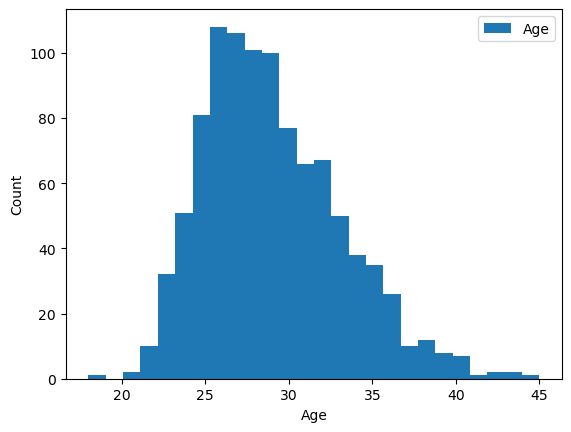

In [168]:
# Build a Histogram showing the age dispersion of pitchers in our dataset. 
# Create histogram buing matplotlib and 30 binsto improve readability. 
import numpy as np
import matplotlib.pyplot as plt


x = tj.age
# Use 27 bins one for every age.
bins = np.linspace(18, 45, 27)

plt.hist([x], bins, label=['Age'])
plt.legend(loc='upper right')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

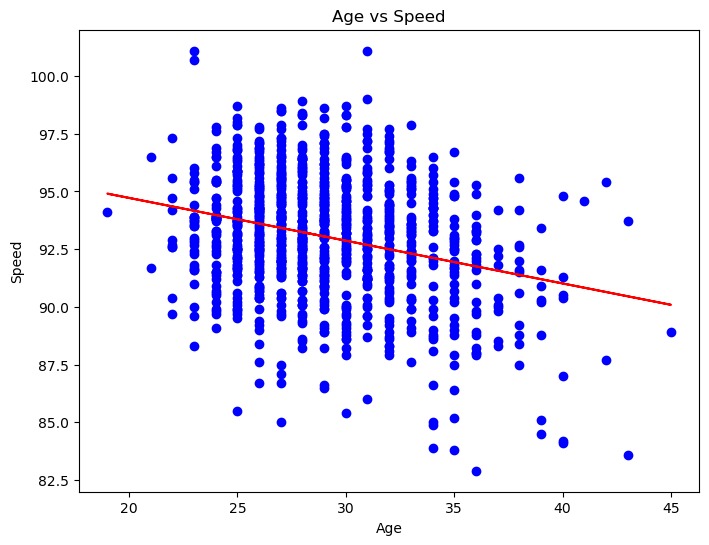

In [176]:
# Build Scattar plot showing the relationship between age and fastball speed. 

plt.figure(figsize=(8, 6))
plt.scatter(tj['age'], tj['fastball_avg_speed'], color='b', marker='o')

# Use numpy to add a trendline
# Define coefficients
coefficients = np.polyfit(tj['age'], tj['fastball_avg_speed'], 1)
# Define Trendline
trendline = np.poly1d(coefficients)
# plot Trendline
plt.plot(tj['age'], trendline(tj['age']), color='r', label='Trendline')
# Add labels and title
plt.title('Age vs Speed')
plt.xlabel('Age')
plt.ylabel('Speed')

# Display the plot
plt.show()

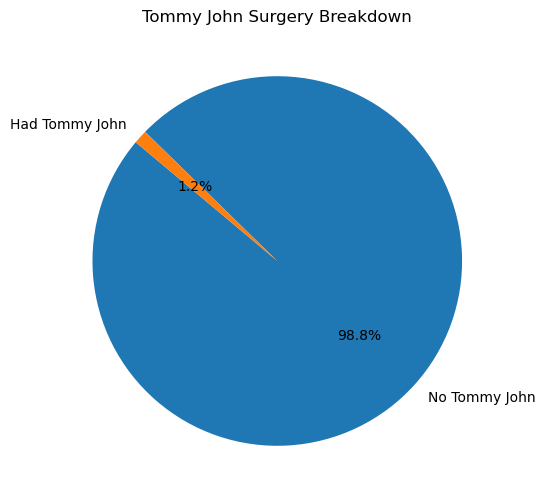

In [180]:
# Build a pie chart showing the breakdown of pitchers who have and have not had tommy john. 

# Calculate the value counts for tommy john history. 
tj_history_counts = tj['tj_history'].value_counts()

# rename the labels for charts
# not just binary. 
tj_labels = ['No Tommy John ', 'Had Tommy John']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(tj_history_counts, labels=tj_labels, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Tommy John Surgery Breakdown')

# Display the plot
plt.show()